<a href="https://colab.research.google.com/github/paramashiva123/ML-DL-practice/blob/main/LeNet_5_Architecture_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Conv2D,Flatten,AveragePooling2D
from keras import Sequential
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
model = Sequential()

model.add(Conv2D(6,kernel_size=(5,5),padding='valid',activation='tanh',input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(16,kernel_size=(5,5),padding='valid',activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(120,activation='tanh'))
model.add(Dense(84,activation='tanh'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_4             │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_5             │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape(-1,28,28,1).astype("float32")/255.0
x_test = x_test.reshape(-1,28,28,1).astype("float32")/255.0

In [ ]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 69ms/step - accuracy: 0.9501 - loss: 0.1636 - val_accuracy: 0.9685 - val_loss: 0.1026
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 72ms/step - accuracy: 0.9717 - loss: 0.0927 - val_accuracy: 0.9752 - val_loss: 0.0797
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 54ms/step - accuracy: 0.9791 - loss: 0.0685 - val_accuracy: 0.9781 - val_loss: 0.0678
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 59ms/step - accuracy: 0.9830 - loss: 0.0544 - val_accuracy: 0.9798 - val_loss: 0.0619
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.9859 - loss: 0.0461 - val_accuracy: 0.9828 - val_loss: 0.0516
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.9896 - loss: 0.0330 - val_accuracy: 0.9847 - val_loss: 0.0467
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.9907 - loss: 0.0295 - val_accuracy: 0.9836 - val_loss: 0.0491
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.9931 - loss: 0.0249 - 

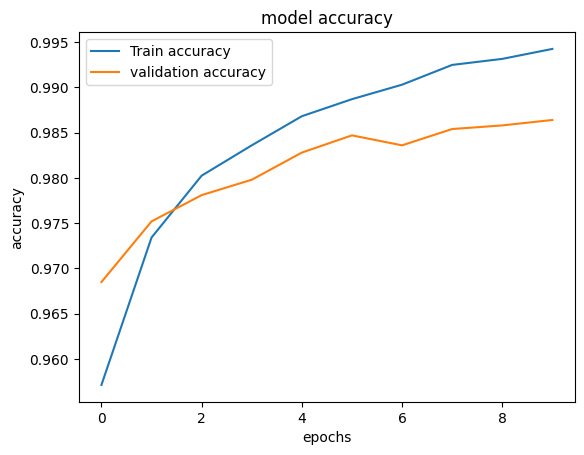

In [ ]:
#plot training accuracy and validation accuracy
plt.plot(history.history['accuracy'],label='Train accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

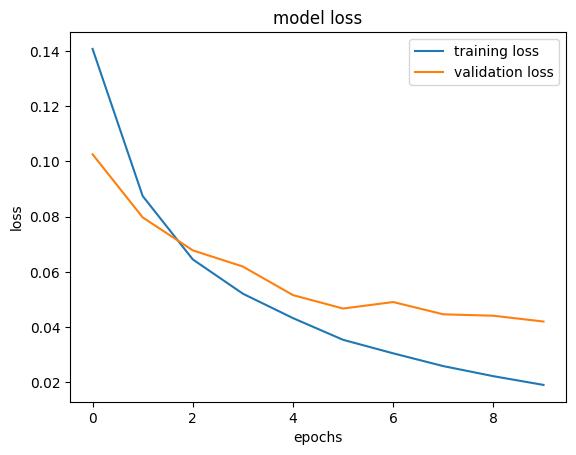

In [ ]:
# plot training and validation loss
plt.plot(history.history['loss'],label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


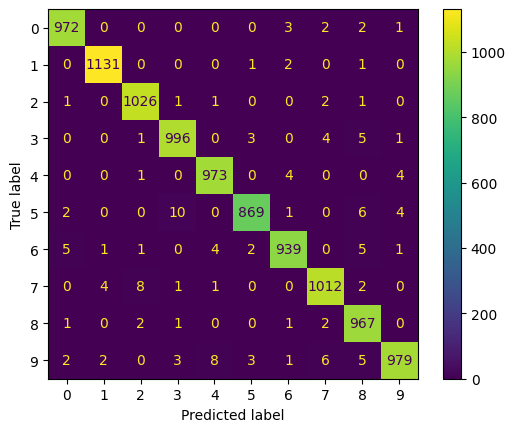

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



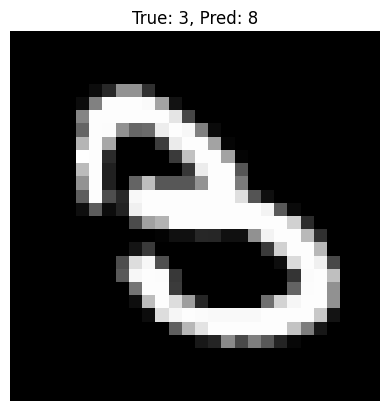

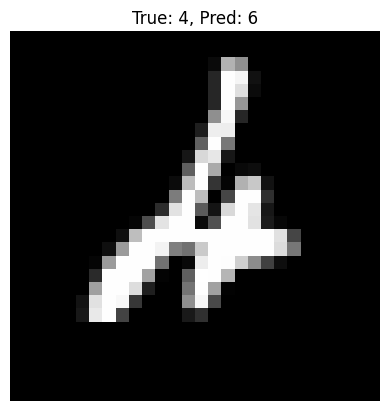

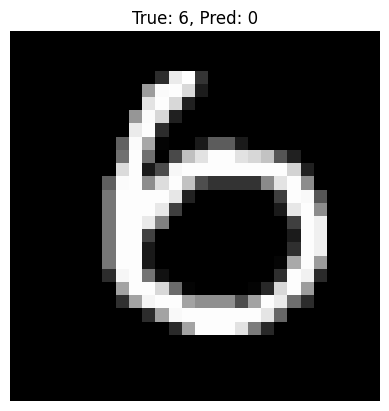

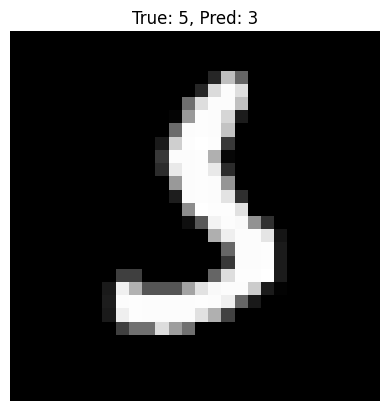

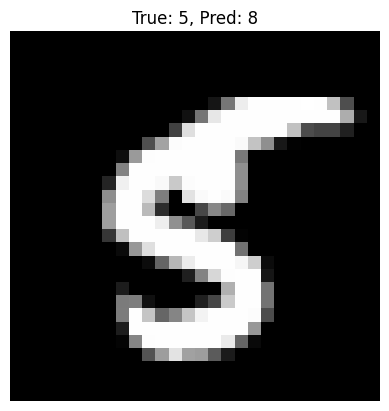

In [ ]:
# Find misclassified indices
misclassified = np.where(y_pred_classes != y_true)[0]

# Show first 5 misclassified images
for i in range(5):
    index = misclassified[i]
    plt.imshow(x_test[index].squeeze(), cmap='gray')
    plt.title(f"True: {y_true[index]}, Pred: {y_pred_classes[index]}")
    plt.axis('off')
    plt.show()